
<div style="display:fill;
           background-color:#e1d9ce;
           letter-spacing:0.5px;border-bottom: 2px solid black;">
<img src="https://images.unsplash.com/photo-1501167786227-4cba60f6d58f?q=80&h=500&w=2000&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D">
    
<H1 style="padding: 10px; color:black; font-weight:600;font-family: 'Garamond', 'Lucida Sans', sans-serif; text-align: center; font-size: 42px;">Binary Classification with a Bank Churn Dataset</H1>
</div>


In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import os
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("dark") # Theme for plots as Dark
sns.set_palette("copper")
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from catboost import Pool, CatBoostClassifier, cv
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.cluster import KMeans
import optuna
import imblearn

<div style="background-color: #e1d9ce; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: black; font-weight: bold; font-size: 42px;">
    Table of Contents
    </h1>
</div>

<a href="#1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 1. Dataset Overview </a><br>
<a href="#2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 2. Data Processing </a> <br>
<a href="#3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 3. Exploratory Data Analysis & Visualization </a> <br>
<a href="#4" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 4. Training Models </a><br>
<a href="#4.1" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 16px;padding-left: 25px;"> 4.1 Random Forest Classifier </a><br>
<a href="#4.2" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 16px;padding-left: 25px;"> 4.2 LGBM Classifier </a><br>
<a href="#4.3" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 16px;padding-left: 25px;"> 4.3 XGB Classifier </a><br>
<a href="#7" style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;"> 5. Creating 'submission.csv' </a><br>


<div id="1" style="background-color: #e1d9ce; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
    Dataset Overview
    </h1>
</div>
<br>
<p style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232;font-size: 22px;">
    (Binary) Target Column: 'Exited' </p>

In [2]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv",index_col="id")
train_data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0


In [3]:
test_data = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv",index_col="id")
test_data.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
165039,15672704,Pearson,593,France,Female,22.0,9,0.00,2,0.0,0.0,51907.72
165040,15647838,Onyemere,682,Spain,Male,45.0,4,0.00,2,1.0,1.0,157878.67
165041,15775307,Hargreaves,539,Spain,Female,47.0,8,0.00,2,1.0,1.0,126784.29
165042,15653937,Hsueh,845,France,Female,47.0,3,111096.91,1,1.0,0.0,94978.10


<div  >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   Concise Summary of Train Data
    </h1>
</div>
<hr>

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 17.6+ MB


<ul style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232; font-size: 20px;"> 
    <li> No 'Na' Values in the dataset.</li>
    <li> 5 columns of dataset are of 'float64' type.</li>
    <li> 5 columns of dataset are of 'int64' type.</li>
    <li> 3 columns of dataset are of 'object' type. (Needs to be processed)</li>
</ul>

<div id="2" style="background-color: #e1d9ce; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
    Data Processing
    </h1>
</div>
<br>
<p style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232; font-size: 20px;"> 
Encoding the columns with 'object' datatype.
   <br>
I used Label Encoding here.
</p>
<img src = "https://miro.medium.com/v2/resize:fit:1400/0*T5jaa2othYfXZX9W.">

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_enc = LabelEncoder()

train_data["Gender"] = label_enc.fit_transform(train_data[["Gender"]])
test_data["Gender"] = label_enc.transform(test_data[["Gender"]])

train_data["Geography"] = label_enc.fit_transform(train_data[["Geography"]])
test_data["Geography"] = label_enc.transform(test_data[["Geography"]])

label_enc.fit(pd.concat([test_data[["Surname"]],train_data[["Surname"]]]))
train_data["Surname"] = label_enc.transform(train_data[["Surname"]])
test_data["Surname"] = label_enc.transform(test_data[["Surname"]])

train_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,1992,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,1993,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,1217,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,1341,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,483,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  int64  
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  int64  
 4   Gender           165034 non-null  int64  
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 17.6 MB


<div id="3" style="background-color: #e1d9ce; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
    Exploratory Data Analysis & Visualization 
    </h1>
</div>

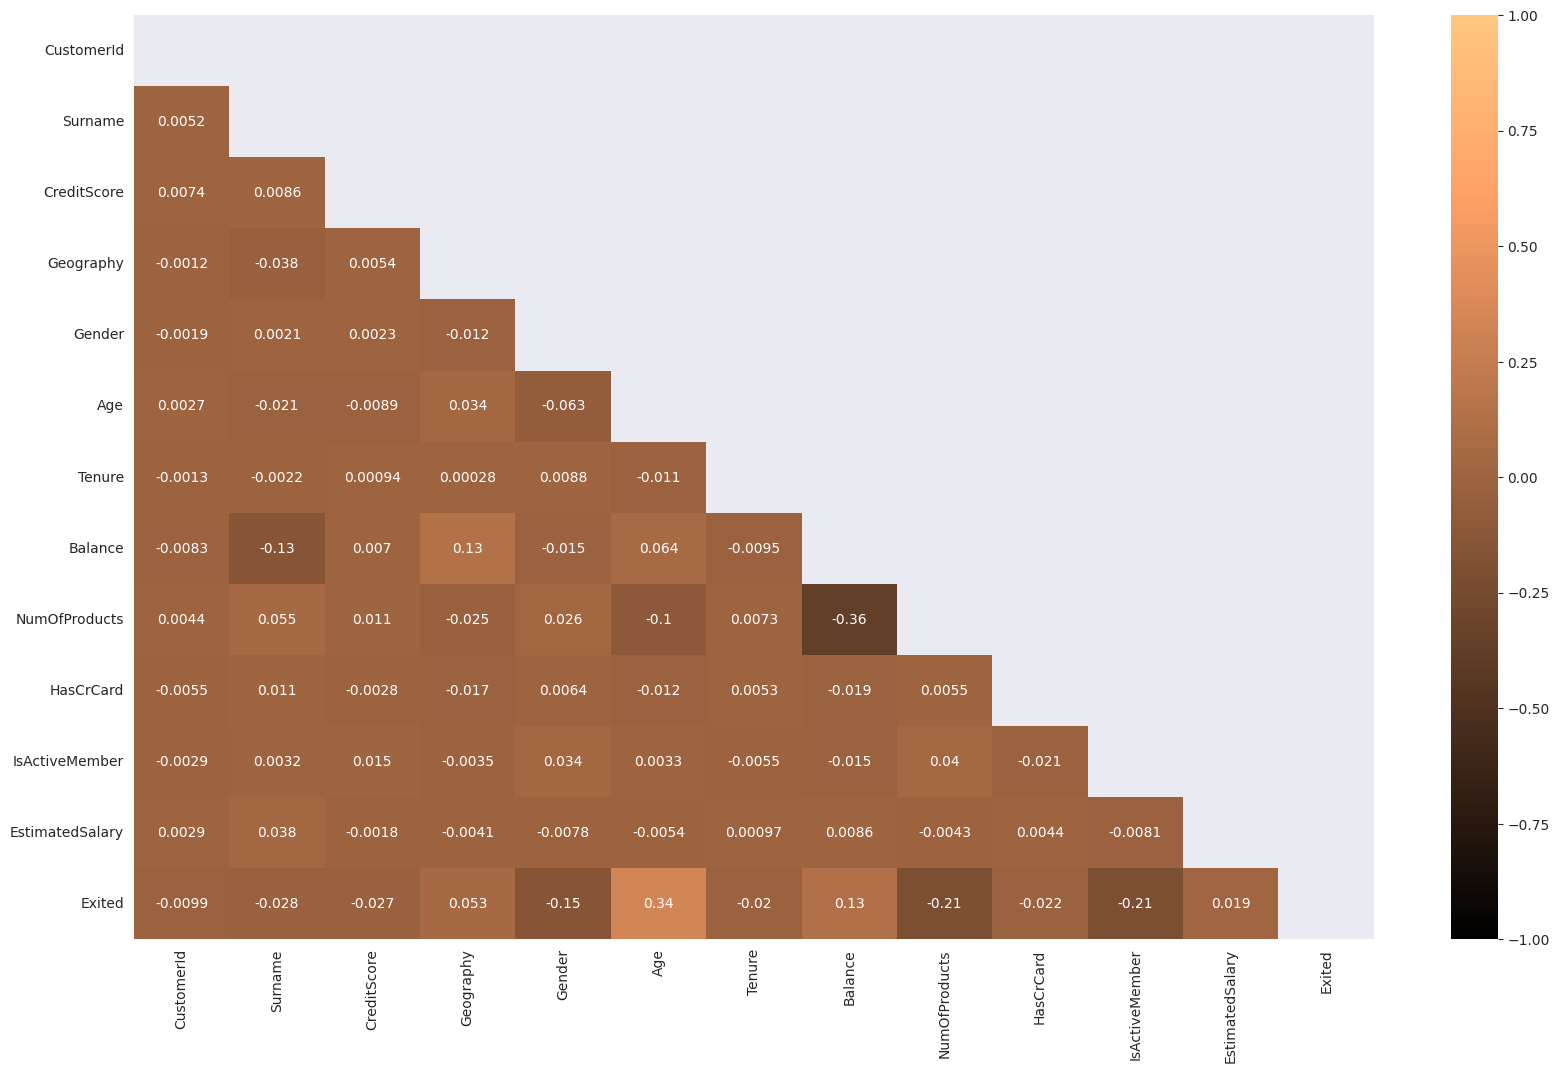

In [7]:
mask = np.triu(np.ones_like(train_data.corr()))
plt.figure(figsize=(20,12))
sns.heatmap(train_data.corr(), cmap="copper", annot=True, mask=mask,vmin=-1,vmax=1);

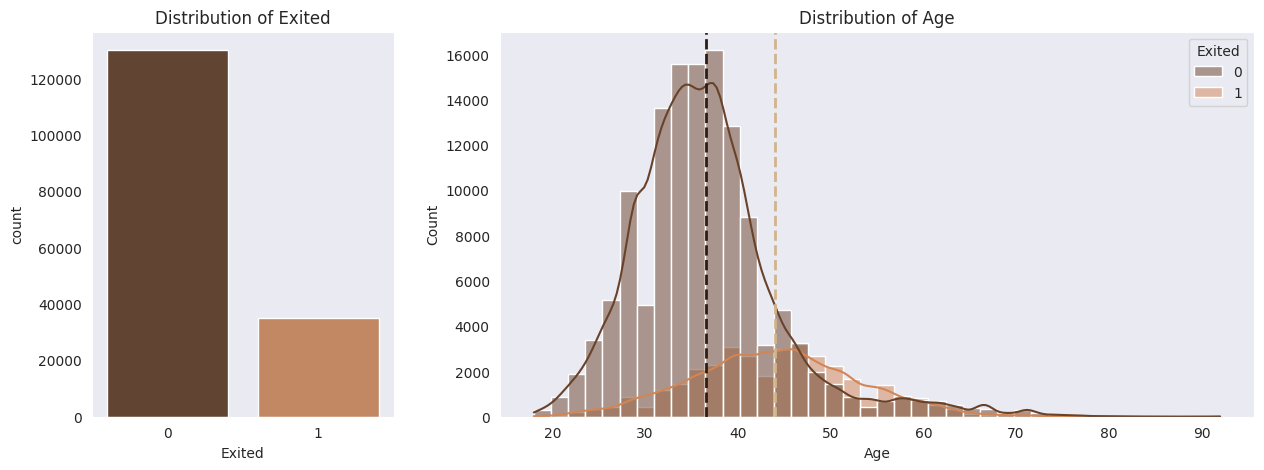

In [8]:
fig,axes = plt.subplots(1,2,figsize=(15,5),gridspec_kw={'width_ratios': [1, 2.5]})

plt.subplot(1,2,1)
sns.countplot(data=train_data,x="Exited", palette = "copper");
plt.title("Distribution of Exited")

plt.subplot(1,2,2)
sns.histplot(data=train_data,x="Age",hue="Exited", bins=40, kde=True, palette = "copper");
plt.axvline(train_data.query("Exited == 1")["Age"].mean(), 0,10,linestyle="--",linewidth=2,c = "tan")
plt.axvline(train_data.query("Exited == 0")["Age"].mean(), 0,10,linestyle="--",linewidth=2)
plt.title("Distribution of Age")

fig.show();

<ul style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232; font-size: 20px;"> 
    <li> The train data is biased.</li>
    <li> Mean 'Age' of Exited==1 and Exited==0 differ by about 5-8 years</li>
</ul>

<div id="4" style="background-color: #e1d9ce; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   Training Models
    </h1>
</div>
<br>
    <p style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232; font-size: 20px;">Link to Scikit-Cheat Sheet: <a style="text-decoration: underline;" href = "https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods">
    https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods</a>
    <br>
    <p style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232; font-size: 20px;">Link to LGBM Guide: <a style="text-decoration: underline;" href="https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/">
    https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/</a>
        <br>
        <p style="font-family: 'Lucida Sans', 'Lucida Sans', sans-serif; text-align: left; color: #323232; font-size: 20px;">Link to XGB Guide: <a style="text-decoration: underline;" href="https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/">
    https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/</a>
        <br><br>
    Evaluation Metric for this Competiton: ROC AUC (ie area under the ROC curve)
        <br>
    &nbsp; &nbsp; The ROC curve is the plot of the true positive rate (TPR) against the false positive rate (FPR)
</p>

In [9]:
X = train_data.drop("Exited",axis=1)
y = train_data.Exited

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3)
print(len(X_train),len(X_val))

115523 49511


<div id="4.1" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   4.1  Random Forest Classifier
    </h1>
</div>
<hr>


In [10]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)
print("ROC AUC of RF:",roc_auc_score(rfmodel.predict(X_val),y_val))

ROC AUC of RF: 0.8115383354443289


<div id="4.2" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   4.2 LGBM (Light Gradient Boosting Machine) Classifier
    </h1>
</div>
<hr>

In [11]:
lgbmmodel = LGBMClassifier(verbose=-1)
lgbmmodel.fit(X_train,y_train)
print("ROC AUC of LGBM:",roc_auc_score(lgbmmodel.predict(X_val),y_val))

ROC AUC of LGBM: 0.8177530351360248


<div id="4.3" >
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #263A29; font-weight: bold; font-size: 36px;">
   4.3 XGB (eXtreme Gradient Boosting) Classifier
    </h1>
</div>
<hr>

In [12]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train,y_train)
print("ROC AUC of XGB:",roc_auc_score(xgbmodel.predict(X_val),y_val))

ROC AUC of XGB: 0.8111113670731492


<div id="7" style="background-color: #e1d9ce; padding: 20px; border-radius: 20px; border: 2px solid black;">
    <h1 style="font-family:  'Garamond', 'Lucida Sans', sans-serif; text-align: center; color: #000000; font-weight: bold; font-size: 42px;">
   Creating 'submission.csv'
    </h1>
</div>

In [13]:
submission = pd.DataFrame()
submission["id"] = test_data.index
submission["Exited"] = (lgbmmodel.predict_proba(test_data)[:,1]+xgbmodel.predict_proba(test_data)[:,1])/2

submission.to_csv("submission.csv",header=True,index=False)
submission

,id,Exited
0,165034,0.023115
1,165035,0.804801
2,165036,0.020611
3,165037,0.226834
4,165038,0.363600
...,...,...
110018,275052,0.039826
110019,275053,0.089579
110020,275054,0.031911
110021,275055,0.139914
